In [ ]:
!pip install diffusers==0.27.2 transformers accelerate safetensors

In [2]:


from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,      # disable safety checker (optional)
    requires_safety_checker=False
).to("cuda")

prompt = "portrait of a young man with short hair"
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

image.save("baseline.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (93 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars . mugshot style , plain grey background , front - facing , studio lighting .']



Generating image for prompt 1...


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as: generated_mugshot_1.png


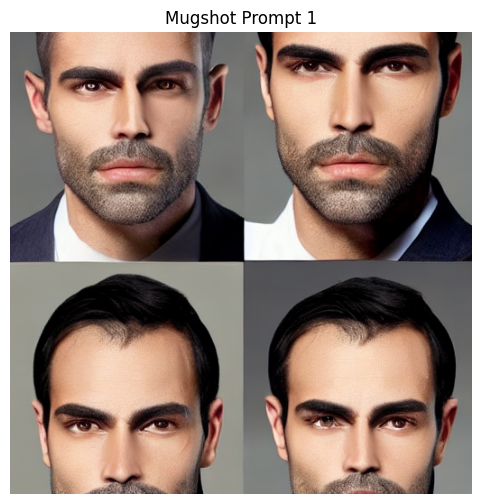


Generating image for prompt 2...


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as: generated_mugshot_2.png


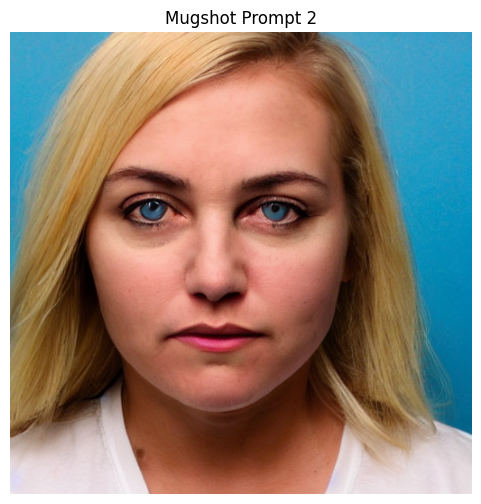


Generating image for prompt 3...


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as: generated_mugshot_3.png


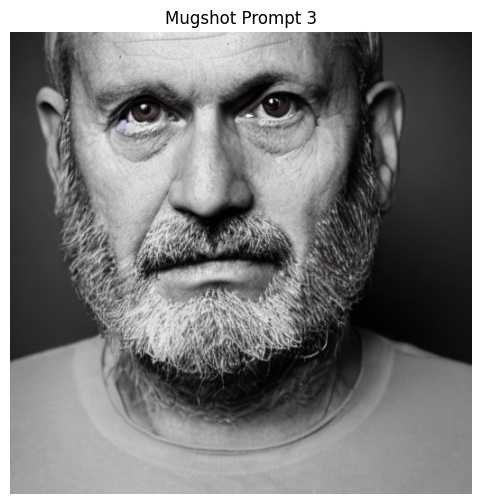


Generating image for prompt 4...


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as: generated_mugshot_4.png


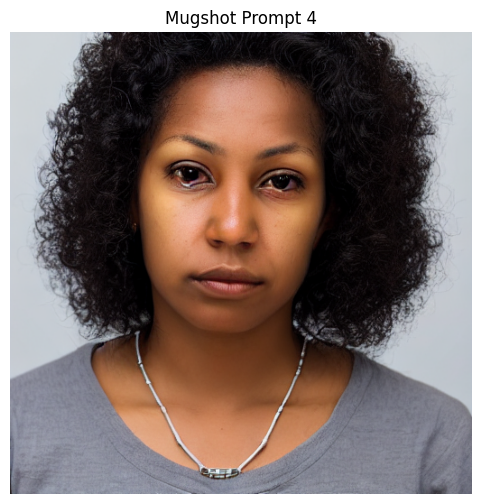


Generating image for prompt 5...


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as: generated_mugshot_5.png


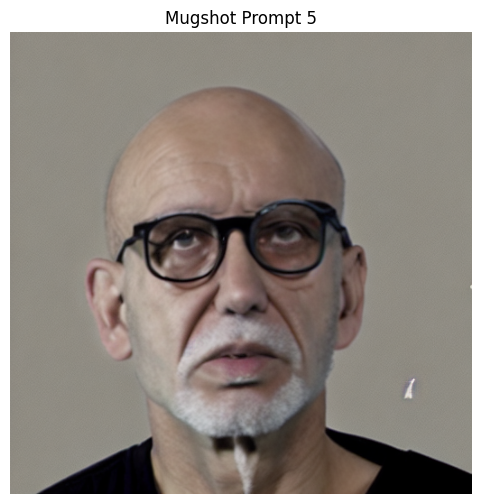

In [3]:
# Install required libraries
#!pip install diffusers==0.27.2 transformers accelerate safetensors

import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Load Stable Diffusion 1.5
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
).to("cuda")

# Your mugshot prompts
prompts = [
    "Light-medium skintone male, oval face, neutral expression. Short dark brown thick hair, straight hairline, smooth forehead. Short well-groomed beard. Medium round dark brown eyes, average lashes. Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip. Strong jawline, defined chin, average ears, no scars. Mugshot style, plain grey background, front-facing, studio lighting.",
    "Female, early 30s, neutral expression, medium length blonde hair pulled back, light makeup, plain blue background, front-facing, professional mugshot style.",
    "Male, late 40s, slightly wrinkled face, short grey hair, stubble beard, dark clothing, white background, straight on, mugshot photography.",
    "Female, mid-20s, dark skin tone, natural curly black hair, no visible jewelry, neutral expression, plain white wall background, clear focus, mugshot.",
    "Male, elderly, bald head with some grey hair on sides, glasses, slight frown, simple black t-shirt, beige background, front-view, mugshot camera style."
]

# Generate images
for i, p in enumerate(prompts):
    print(f"\nGenerating image for prompt {i+1}...")

    # Generate 512x512 images (768x768 may exceed VRAM)
    image = pipe(
        p,
        height=512,
        width=512,
        num_inference_steps=30,
        guidance_scale=7.5
    ).images[0]

    filename = f"generated_mugshot_{i+1}.png"
    image.save(filename)

    print(f"Image saved as: {filename}")

    # Show image using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Mugshot Prompt {i+1}")
    plt.axis('off')
    plt.show()
